# MNIST

In [2]:
from keras.datasets import mnist
# mnist data load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 1s 0us/step


In [5]:
# train_shape
print(train_images.shape)
print(len(train_labels))
train_labels

(60000, 28, 28)
60000


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# test_shape
print(test_images.shape)
print(len(test_labels))
test_labels

(10000, 28, 28)
10000


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [8]:
# model structure
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation = 'relu', input_shape = (28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
# model compile
network.compile(optimizer = 'rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [13]:
# data loader
print(train_images.shape)
train_images_ = train_images.reshape( (60000, 28 * 28 ))
print(train_images_.shape)
train_images_ = train_images_.astype('float32') / 255
print(train_images_.shape)

print(test_images.shape)
test_images_ = test_images.reshape( (10000, 28 * 28 ))
print(test_images_.shape)
test_images_ = test_images_.astype('float32') / 255
print(test_images_.shape)

(60000, 28, 28)
(60000, 784)
(60000, 784)
(10000, 28, 28)
(10000, 784)
(10000, 784)


In [16]:
# label loader
from tensorflow.keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [17]:
# fitting
network.fit(
    x = train_images_,
    y = train_labels,
    epochs = 5,
    batch_size = 128
)

Epoch 1/5
469/469 [==============================] - 2s 5ms/step - loss: 0.2566 - accuracy: 0.9260
Epoch 2/5
469/469 [==============================] - 2s 5ms/step - loss: 0.1036 - accuracy: 0.9686
Epoch 3/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 4/5
469/469 [==============================] - 3s 5ms/step - loss: 0.0497 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 2s 5ms/step - loss: 0.0370 - accuracy: 0.9890


In [18]:
# test evaluation
test_loss, test_acc = network.evaluate(test_images_, test_labels)
print('test_acc > :', test_acc)

313/313 [==============================] - 0s 747us/step - loss: 0.0622 - accuracy: 0.9810
test_acc > : 0.9810000061988831


# 신경망을 위한 데이터 표현

        Tensor == 데이터를 위한 컨테이너

In [2]:
# 스칼라 0D Tensor
# 하나의 숫자만 담고 있는 tensor == scalar ( numpy > float32, float64 ) tensor의 축 개수는 rank 

import numpy as np
x = np.array(12) # scalar tensor
print(x)
print(x.ndim) # number of dimensions


12
0


In [5]:
# 벡터 1D Tensor
# 하나의 축을 가진 tensor

x = np.array( [12, 3, 6, 14, 7]) # 5개 원소 == 5차원 벡터.
print(x)
print(x.ndim)

# 5D 벡터는 하나의 축을 따라 5개의 차원을 가진 것. 5D tensor는 5개의 축을 가진 것.

[12  3  6 14  7]
1


In [7]:
# 행렬 metrix 2D Tensor

x = np.array(
    [[5,78,2,34,0], # 행 > 1행 : [5,78,2,34,0]
     [6,79,3,35,1],
     [7,80,4,36,2]]
)
     # 열 > 1열 : [5,6,7]
print(x.ndim)

2


In [9]:
# 3D Tensor & 고차원 Tensor
x = np.array(
    [[[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]],
     [[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]],
     [[5,78,2,34,0],
      [6,79,3,35,1],
      [7,80,4,36,2]]]
)

print(x.ndim)

# 3D tensor를 하나의 배열로 합치면 4D 텐서를 만드는 식으로 이어짐. 동영상 데이터를 다룰 경우에는 5D 텐서까지 가기도 함.

3


In [10]:
축의 개수 (rank) :  np.ndim 에서 확인 가능
크기 (shape) : Tensor의 각 축을 따라 얼마나 많은 차원이 있는지를 나타내느 파이썬의 tuple
               위의 3D Tensor의 크기는 (3,3,5) , 2D Tensor의 크기는 (3,5), 1D 벡터의 크기는 (5,), Scalar의 크기는 ()
데이터 타입 : numpy에서는 dtype에 저장. ( float32, uint8, float64 )

In [12]:
# MNIST dataset
from keras.datasets import mnist
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [15]:
# 축 확인
print(train_images.ndim)
print(train_images.shape)
print(train_images.dtype)

# 8비트 정수형 3D 텐서
# 28 x 28 크기의 정수 행렬 6만개가 있는 배열.
# 각 행렬은 하나의 흑백 이미지. 행렬의 각 원소는 0~255 사이값을 가짐.

3
(60000, 28, 28)
uint8


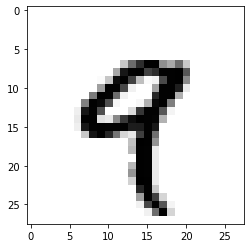

In [18]:
# 3D Tensor에서 5번째 샘플 확인
digit = train_images[4]
from matplotlib import pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [21]:
# numpy로 Tensor 조정
my_slice = train_images[10:100] # 11번째 ~ 101번째까지
print(my_slice.shape)

my_slice = train_images[10:100, :, :]
print(my_slice.shape)

my_slice = train_images[10:100, 0:28, 0:28]
print(my_slice.shape)

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


In [22]:
# 오른쪽 하단 14x14 픽셀 선택시
my_slice = train_images[:, 14:, 14:]
print(my_slice.shape)

# 음수 index
my_slice = train_images[:, 7:-7, 7:-7]
print(my_slice.shape)

(60000, 14, 14)
(60000, 14, 14)


In [24]:
# 배치 데이터
# 일반적으로 딥러닝에서 사용하는 모든 데이터 Tensor의 첫 번째 축 == 샘플 축
# MNIST [0] == 숫자 이미지
# 딥러닝 모델은 한 번에 전체 데이터셋을 처리하지 않는다. 대신 데이터를 batch로 나눔.

batch_size = 128
batch_1 = train_images[:128]
batch_2 = train_images[128:256]
# batch_n = train_images[128 * n : 128 * (n+1)]

# 배치 데이터를 다룰 때는 첫 번째 축을 배치 축 또는 배치 차원이라고 부름.

In [4]:
# Tensor 실제사례
# 벡터 데이터 > (samples, features) 크기의 2D
# 시계열 데이터 또는 시퀀스 데이터 > (samples, timesteps, features) 크기의 3D 텐서
# 이미지 > (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
# 동영상 > (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

In [5]:
# 벡터 데이터
# 대부분의 경우 해당. 데이터셋에서는 하나의 데이터 포인트가 벡터로 인코딩 될 수 있으므로 배치 데이터는 2D 텐서로 인코딩.
# 첫 번째 축은 샘플 축, 두 번째 축은 특성 축
# 사람의 나이, 우편 번호, 소득으로 구성된 인구 통계 데이터. 각 사람은 3개의 값을 가진 벡터로 구성, 10만 명이 포함된 전체 데이터셋은 (100000,3) 크기의 텐서에 저장될 수 있다.
# (공통 단어 2만 개로 만든 사전에서) 각 단어가 등장한 횟수로 표현된 텍스트 문서 데이터셋. 각 문서는 2만 개의 원소(사전에 있는 단어마다 하나의 원소에 대응합니다.) 를 가진 벡터로 인코딩 될 수 있습니다.
# 500개의 문서로 이루어진 전체 데이터셋은 (500, 20000) 크기의 텐소로 저장.

In [6]:
# 시계열 데이터 또는 시퀀스 데이터
# 데이터에서 시간이 중요할 때는 시간 축을 포함하여 3D텐서로 저장됨.
# 각 샘플은 벡터의 시퀀스로 인코딩되므로 배치 데이터는 3D 텐서로 인코딩치
# 관례적으로 시간 축은 항상 두 번째 축( 인덱스 ==1 ). 
# 주식 가격 데이터 셋 >  1분 마다 현재 주식 가격, 지난 1분 동안에 최고 가격과 최소 가격을 저장. 1분마다 데이터는 3D 벡터로 인코딩되고 하루 동안의 거래는 (390,3) 크기의 2D 텐서로 인코딩됩니다. (하루 거래 390분)
# 250일치의 데이터는 (250, 390, 3) 크기의 3D 텐서로 저장될 수 있음. 여기에서 1일치 데이터가 하나의 샘플
# 트윗 데이터셋 >  각 트윗은 128개의 알파벳으로 구성된 280개의 문자 시퀀스. 여기에서는 각 문자가 128개의 크기인 이진 벡터로 인코딩 (해당 문자의 인덱스만 1, 나머지 0). 그러면 각 트윗은 (280,128) 크기의 2D 
# 텐서로 인코딩 될 수 있음. 100만 개의 트윗으로 구성된 데이터셋은 (1000000, 280,128) 크기의 텐서.

## 이미지 데이터

In [29]:
# 이미지는 전형적으로 높이, 너비, 컬러 채널의 3차원으로 이루어짐. MNIST 숫자처럼 흑백 이미지는 하나의 컬러 채널만을 가지고 있어 2D 텐서로 저장. 관례상 이미지 텐서는 3D로 저장.
# 흑백 이미지의 경우 컬러 채널의 차원 크기는 1. 256x256 크기의 흑백 이미지에 대한 128개의 배치는 (128, 256,256, 1) 크기의 텐서에 저장될 수 있음.
# 컬러 이미지에 대한 128개의 배치라면 (128, 256, 256, 3) 크기의 텐서에 저장.

# 이미지 텐서의 크기를 지정하는 방식은 두 가지.

# (Tensorflow) 채널 마지막 방식    //    (씨아노) 채널 우선 방식.
# 구글의 tensorflow 머신 러닝 프레임워크는 (samples, height, width, color_depth)처럼 컬러 채널의 깊이를 끝에 놓는다.
# 씨아노는 (samples, color_depth, height, width)처럼 컬러 채널의 깊이를 배치 축 바로 뒤에 놓음.
# 씨아노 방식을 사용하면 앞선 예제 > (128, 1, 256, 256) 그리고 (128, 3, 256, 256)
# 케라스는 두개 다 지원

In [ ]:
# 비디오 데이터
# 비디오 데이터는 현실에서 5D 텐서가 필요한 몇 안되는 데이터 중 하나. 하나의 비디오는 프레임의 연속, 각 프레임은 하나의 컬러 이미지.
# 프레임이 (height, width, color_depth) 의 3D Tensor로 저장될 수 있기 때문에 프레인의 연속은 (frames, height, width, color_depth) 4D Tensor 로 저장
# 여러 비디오의 배치는 (samples, frames, height, width, color_depth) 로 5D Tensor.
 
# 예를 들어 60초짜리 144x256 유튜브 비디오 클립을 초당 4frame 으로 샘플링 하면 240 프레임.
#  이런 비디오 클립을 4개 가진 배치는 (4, 240,144,256,3)

In [ ]:
# 신경망의 톱니바퀴

# Dense 층
"""Keras.layers.Dense(512, activation='relu')"""

# 2D 텐서를 입력으로 받고 입력 텐서의 새로운 표현인 또 다른 2D 텐서를 반환하는 함수 (w는 2D텐서, b는 벡터)
"""output = relu(dot(w, input) +b)"""

# 자세하게
# 입력 텐서와 텐서 w 사이의 점곱(dot), 점곱의 결과인 2D 텐서와 벡터 b 사이의 덧셈(+), 마지막으로 relu 연산

In [4]:
# 원소별 연산
# relu 함수와 덧셈은 원소별 연산.

# 단순 원소별 연산
def naive_relu(x):
    assert len(x.shape) == 2 # x s는 2D 넘파이 배열
    # assert : 가정설정문. assert 뒤의 조건이 True가 아니면 AssertError를 발생시킨다.
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] = max(x[i,j],0)
    return x

# 덧셈 - 동일한 2D 텐서만 지원
def naive_add(x,y):
    assert len(x.shape) == 2 # x,y 2D 넘파이 배열
    assert x.shape == y.shape
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[i,j]
    return x

# 같은 원리로 원소별 곱셈, 뺄샘 등을 활용

In [6]:
# numpy 원소별 연산
# import numpy as np
# z = x + y # 원소별 덧셈
# z = np.maximum(z, 0.) # 월소별 Relu 함수

In [7]:
# 브로드캐스팅
# 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞추어 브로드캐스팅이 됨.
# 1) 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가됨. ( 브로드캐스팅 축 )
# 2) 작은 텐서가 새 축을 따라서 큰 텐서의 크기에 맞도록 반복됨.

In [8]:
# x 의 크기는 (32, 10), y 의 크기는 (10,) 일 때,
# y에 비어있는 첫 번째 축을 추가하여 (1, 10) 으로 만듬
# 그 다음 y를 이 축에 32번 반복하면 tensor y 는 (32, 10) 이 됨.
# 여기서 Y[i, :] == y for i in range(0, 32)가 됨.
# 그러면 x, y 의 크기가 같으므로 더할 수 있게 된다.

In [10]:
# 구현 입장에서 새로운 텐서가 만들어지면 매우 비효율적이여서 어떤 2D 텐서도 만들어지지 않는다.
# 반복된 연산은 완전히 가상적.
# 새로운 축을 따라 벡터가 32번 반복된다는 것으로 생각하면 됨.

# 단순 구현
def navie_add_matrix_and_vector(x,y):
    assert len(x.shape) == 2  # 2D 넘파이 배열
    assert len(y.shape) == 1  # y는 넘파이 배열
    assert x.shape[1] == y.shape[0]
    
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i,j] += y[j]
    return x

In [ ]:
# (a, b, ... n, n+1, ... m) 크기의 텐서와 (n, n+1, ... m) 크기의 텐서 사이에 브로드캐스팅으로 원소별 연산을 적용.
# 이때 브로드캐스팅은 a 부터 n-1까지의 축에 자동으로 일어남.
# 두 텐서에 브로드캐스팅으로 원소별 maximum 연산을 적용하는 예.

import numpy as np
x = np.random.random( (64, 3, 32, 10))  # x는 (64,3,32,10) 크기의 랜덤 텐서
y = np.random.random( (32,10) ) # y는 (32,10) 크기의 랜덤 텐서
z = np.maximum(x,y) #출력 z 크기는 x와 동일하게 (64,3,32,10) .

In [ ]:
# 텐서 점곱
# 텐서 곱셈이라고도 부르는 (원소별 곱셈과 혼동하지 마세요). 점곱 연산은 가장 널리 사용되고 유용한 텐서 연산
# - 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킨다.
# numpy, keras, Tensorflow에서 원소별 곱셈은 * 연산자 사용. Tensorflow에서는 dot 연산자가 다르지만 numpy, keras는 점곱 연산에 보편적인 dot 연산자를 사용

import numpy as np
z = np.dot(x,y)
z = x * y

# 점곱 연산은 2개의 벡터 x,y 의 점곱은 아래와 같음

def naive_vector_dot(x,y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

# 두 벡터의 점곱은 스칼라, 원소 개수가 같은 벡터끼리 점곱이 가능함
